   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

/tmp/ipython-input-2-2451485126.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex_encoded'] = le.fit_transform(df['sex'])
/tmp/ipython-input-2-2451485126.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fare_scaled'] = scaler.fit_transform(df[['fare']])


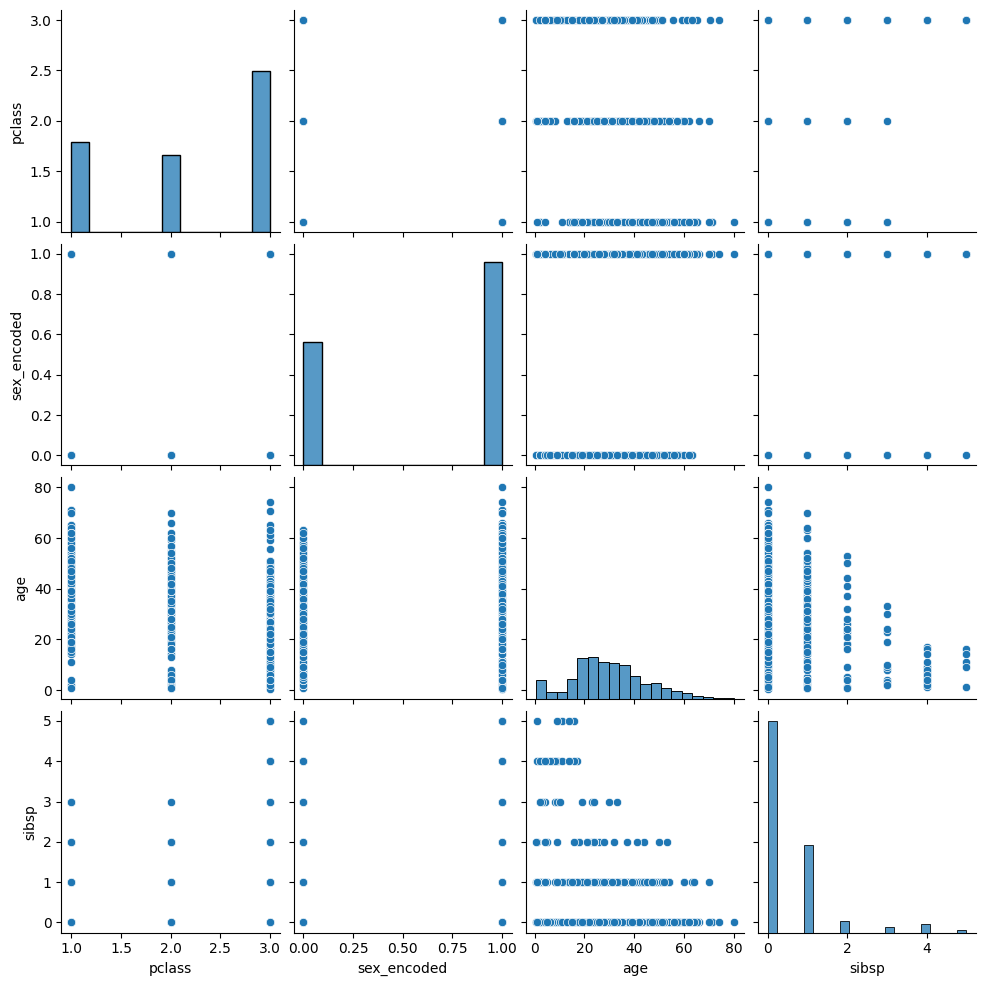

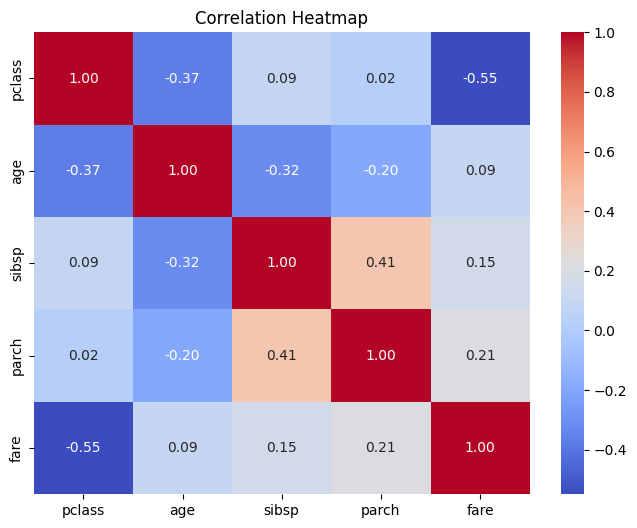

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Load the Titanic dataset
df = sns.load_dataset('titanic')

# 2. Explore the dataset
print(df.head())
print(df.info())

# 3. Forward fill and backward fill on 'age'
df['age_forward_fill'] = df['age'].ffill()
df['age_backward_fill'] = df['age'].bfill()

# 4. Skip filling 'cabin' as seaborn dataset has no 'cabin' column

# 5. Remove duplicate records if any
df = df.drop_duplicates()

# 6. Encode 'sex' column using LabelEncoder
le = LabelEncoder()
df['sex_encoded'] = le.fit_transform(df['sex'])

# 7. Scale 'fare' using StandardScaler
scaler = StandardScaler()
df['fare_scaled'] = scaler.fit_transform(df[['fare']])

# 8. Pairplot for selected features
sns.pairplot(df[['pclass', 'sex_encoded', 'age', 'sibsp']].dropna())
plt.show()

# 9. Correlation heatmap for selected features
corr_features = ['pclass', 'age', 'sibsp', 'parch', 'fare']
corr_matrix = df[corr_features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()